# Notebook for demo how to get features with [neuron_morphology](https://github.com/AllenInstitute/neuron_morphology)

To obtain the package, please see [https://neuron-morphology.readthedocs.io/en/readthedocs/](https://neuron-morphology.readthedocs.io/en/readthedocs/).

This step-by-step guid will walk you through the whole process of getting the interested features with neuron_morphology.


In [1]:
import sys
sys.path.insert(0, "../")
#import warnings
#warnings.filterwarnings('ignore')

from io import StringIO
import requests
from neuron_morphology.swc_io import morphology_from_swc
from neuron_morphology.feature_extractor.data import Data
from neuron_morphology.feature_extractor.feature_extractor import FeatureExtractor
import neuron_morphology.feature_extractor.feature_writer as fw
from neuron_morphology.features.default_features import default_features

import matplotlib.pyplot as plt
import json
import numpy as np

2022-07-11 12:46:44,813 numexpr.utils INFO     Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-07-11 12:46:44,820 numexpr.utils INFO     NumExpr defaulting to 8 threads.


## Pick your neuron (.swc/.csv)

Here select one SWC file as an example.

In [2]:
def data_from_url(morphology_url):
    morphology_swc = StringIO(requests.get(morphology_url).text)

    # Feature functions expect a Data object - in this case just a wrapper for a Morphology
    # If we were working with additional data (say, layer annotations) we would store these here as well
    return Data(morphology_from_swc(morphology_swc))

# fetch a published reconstruction
IVSCC_swc_file = "http://celltypes.brain-map.org/api/v2/well_known_file_download/491120375"

## Load SWC file as morphology data

We can load the SWC file into our morphology data object and then calculate features on it.

C:\Users\Public\Anaconda3\envs\neuronSim\lib\site-packages\neuron_morphology\swc_io.py:50: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  nodes = swc_data.to_dict('record')


Text(0.5, 1.0, 'z-y view')

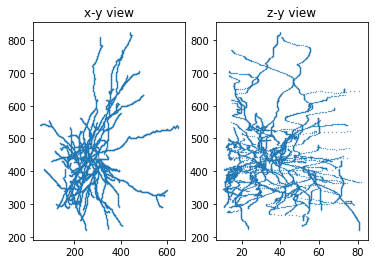

In [3]:
# fetch a published reconstruction 
test_data = data_from_url(IVSCC_swc_file)

# directly load a swc file given its file path
# test_data = Data(morphology_from_swc(IVSCC_swc_file))

nodes = test_data.morphology.nodes()

x = [node['x'] for node in nodes]
y = [node['y'] for node in nodes]
z = [node['z'] for node in nodes]

fig, ax = plt.subplots(1, 2)
ax[0].scatter(x, y, s=0.1)
ax[0].set_title('x-y view')
ax[1].scatter(z, y, s=0.1)
ax[1].set_title('z-y view')

## List default features to extract

## Register your interested features 

In this example, we register all the default features to extract.

In [4]:
fe = FeatureExtractor()
fe.register_features(default_features)

### Extracting features

In [5]:
feature_extraction_run = fe.extract(test_data)

2022-07-11 12:46:49,751 root         INFO     skipping mark (validation failed): type
2022-07-11 12:46:49,762 root         INFO     skipping mark (validation failed): type
2022-07-11 12:46:49,764 root         INFO     skipping mark (validation failed): type
C:\Users\Public\Anaconda3\envs\neuronSim\lib\site-packages\neuron_morphology\feature_extractor\mark.py:117: UserWarning: This morphology is not uniquely rooted! Found 7 root nodes. Features using the root node of this morphology may not select that node consistently. Some or all of these root nodes may not be soma nodes.
  warnings.warn(
2022-07-11 12:46:49,777 root         INFO     selected marks: <bound method FeatureExtractionRun.select_marks of <neuron_morphology.feature_extractor.feature_extraction_run.FeatureExtractionRun object at 0x0000029E2D396430>>
2022-07-11 12:46:49,778 root         INFO     skipping feature: apical_dendrite.bifurcation.dimension. Found extra marks: ['RequiresApical']
2022-07-11 12:46:49,779 root        

2022-07-11 12:46:49,825 root         INFO     skipping feature: axon.axon.earth_movers_distance. Found extra marks: ['RequiresReferenceLayerDepths', 'RequiresLayeredPointDepths']
2022-07-11 12:46:49,827 root         INFO     skipping feature: dendrite.axon.earth_movers_distance. Found extra marks: ['RequiresReferenceLayerDepths', 'RequiresLayeredPointDepths']
2022-07-11 12:46:49,827 root         INFO     skipping feature: basal_dendrite.axon.earth_movers_distance. Found extra marks: ['RequiresReferenceLayerDepths', 'RequiresLayeredPointDepths']
2022-07-11 12:46:49,828 root         INFO     selected features: ['dendrite.bifurcation.dimension', 'basal_dendrite.bifurcation.dimension', 'all_neurites.bifurcation.dimension', 'axon.bifurcation.dimension', 'dendrite.node.dimension', 'basal_dendrite.node.dimension', 'all_neurites.node.dimension', 'axon.node.dimension', 'dendrite.compartment.dimension', 'basal_dendrite.compartment.dimension', 'all_neurites.compartment.dimension', 'axon.compartme

ZeroDivisionError: division by zero

## Results

In [6]:
results = feature_extraction_run.results

from neuron_morphology.feature_extractor.utilities import unnest
unnest(results)

NameError: name 'feature_extraction_run' is not defined

##### Or save the features as h5 or csv file

In [ ]:
heavy_path = "test_features.h5"
table_path = "test_features.csv"

features_writer = fw.FeatureWriter(heavy_path, table_path)
features_writer.add_run("test", feature_extraction_run.serialize())
features_writer.write_table()